In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

path= ("/Users/davidpinosproano/Desktop/COSC 301/project301/git/course-project-group_6004/analysis/kickstarter.csv")



def load_and_process(url_or_path_to_csv_file):
    df1 = pd.read_csv(url_or_path_to_csv_file).dropna()
    return df1

df = load_and_process(path)
df 


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 4:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 0:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 3:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 8:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 2:35,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 3:35,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13,200.0,failed,6,US,200.0,200.0,15000.00


In [43]:
sns.set_style("ticks")
sns.set_context("paper",font_scale=1.5)
# creating column that shows succes rate

df = df.assign(Percent_Funded= lambda df:df['pledged']/df['goal']*100)

df2 = df.loc[:,['main_category','Percent_Funded']]

df2 = df2.groupby(by="main_category").mean().sort_values('Percent_Funded',ascending =False)
df2 
# this is the percent funding per category 



,Percent_Funded
main_category,
Music,817.961881
Games,746.502457
Comics,643.382447
Technology,295.651588
Art,249.235927
Crafts,244.074641
Design,208.084678
Publishing,184.623887
Film & Video,152.530698


In [83]:
# 100 biggest kickstarters campaigns that where sucessfully funded.
df3 = df[['name','main_category','goal','state']]
df3= df3.loc[df3['state']=='successful'].sort_values('goal',ascending =False).head(100).reset_index(drop=True)
df3



,name,main_category,goal,state
0,The Veronica Mars Movie Project,Film & Video,2000000.0,successful
1,Bring Back MYSTERY SCIENCE THEATER 3000,Film & Video,2000000.0,successful
2,Camelot Unchained,Games,2000000.0,successful
3,WISH I WAS HERE,Film & Video,2000000.0,successful
4,Shenmue 3,Games,2000000.0,successful
...,...,...,...,...
95,Skriware - Home 3D Printing for everyone,Technology,440000.0,successful
96,Pakayak - The Ultimate Packable Kayak,Design,427325.0,successful
97,JourneyQuest Season 3,Film & Video,420000.0,successful
98,"""The Goon"" Movie... let's KICKSTART this sucke...",Film & Video,400000.0,successful


In [77]:
# the top category within the 100 best startups was games appearing 43 times.Furthermore, there were 8 
#different cateogries within the top 100 

df3['main_category'].describe()





count       100
unique        8
top       Games
freq         43
Name: main_category, dtype: object

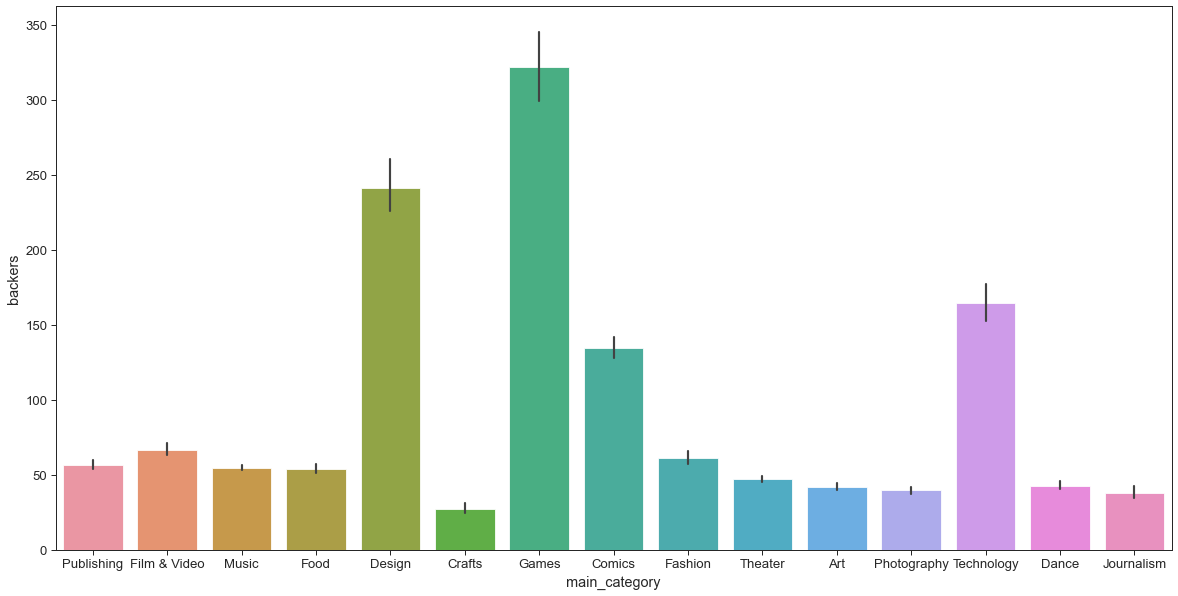

In [160]:
#  average number of backers per category 

df4 = df[['main_category','backers']]

plt.figure(figsize=(20, 10))
sns.barplot(x = "main_category" ,y='backers',data = df4)



In [125]:
df5 = df[['name','main_category','goal','state']]
df5= df5.loc[df5['state']=='successful'].sort_values('goal',ascending =False).reset_index(drop=True)




,name,main_category,goal,state
0,The Veronica Mars Movie Project,Film & Video,2000000.00,successful
1,Bring Back MYSTERY SCIENCE THEATER 3000,Film & Video,2000000.00,successful
2,Camelot Unchained,Games,2000000.00,successful
3,WISH I WAS HERE,Film & Video,2000000.00,successful
4,Shenmue 3,Games,2000000.00,successful
...,...,...,...,...
133846,Chiefstarter,Art,1.00,successful
133847,The fB Project - Mylife Yourlife Ourlife,Art,1.00,successful
133848,Dark Thunder: The Desktop Wallpaper!,Comics,1.00,successful
133849,LENDEMAIN DE VEILLE,Music,1.00,successful


In [127]:
df5['main_category'].describe()
# music is the number one category that has the most sucessful startups 

count     133851
unique        15
top        Music
freq       24105
Name: main_category, dtype: object

<Figure size 1440x720 with 0 Axes>

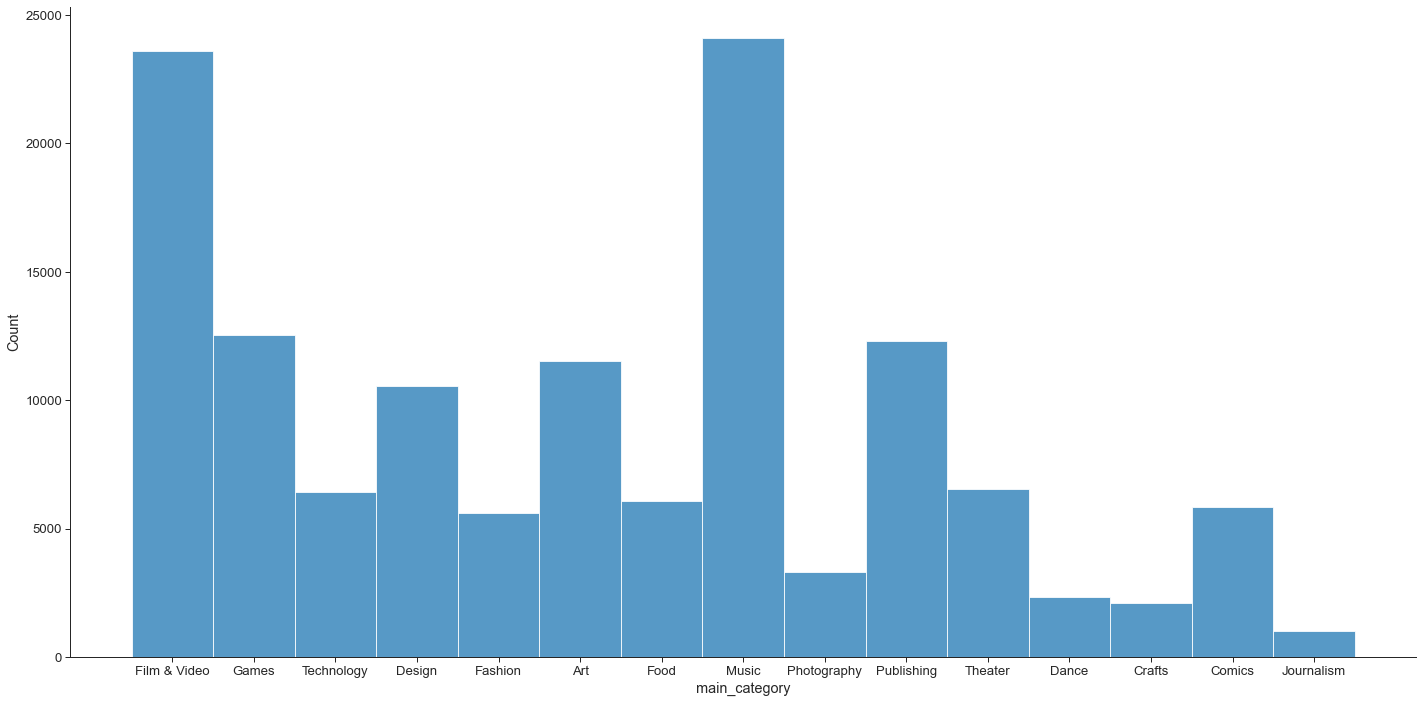

In [133]:
# plots the amount of sucessful kickstarters per category
plt.figure(figsize=(20, 10))
sns.displot(df5, x="main_category",height=10,aspect=2)

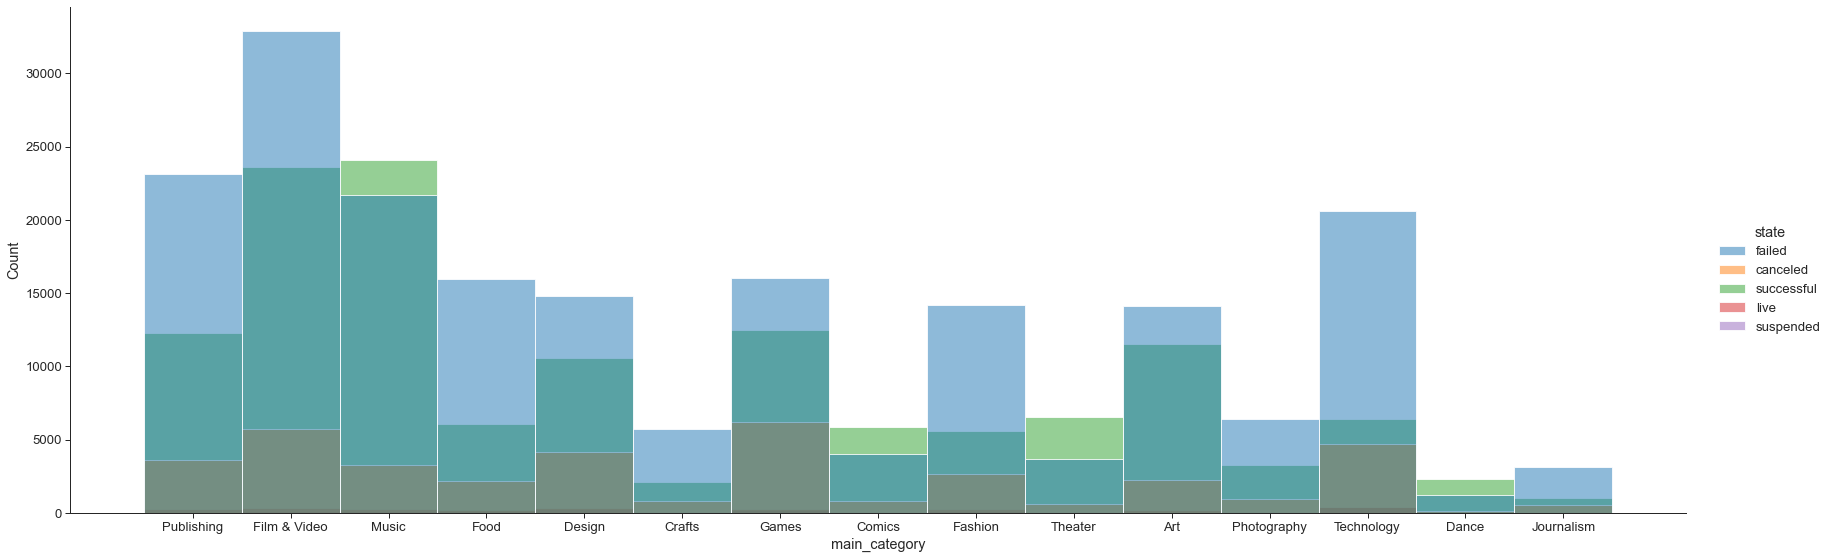

In [145]:
#  count for every state for individual categories
sns.displot(df, x="main_category", hue="state",aspect =3,height =8)

321.84008516678495